In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [ ]:
df=pd.read_csv('/content/zomato.csv')
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [ ]:
df.shape

(56252, 13)

In [ ]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [ ]:
df=df.drop(['address','phone','rest_type','dish_liked'],axis=1,errors='ignore')
df.head()

,name,online_order,book_table,rate,votes,location,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         56236 non-null  object
 1   online_order                 56233 non-null  object
 2   book_table                   56194 non-null  object
 3   rate                         48414 non-null  object
 4   votes                        56174 non-null  object
 5   location                     56126 non-null  object
 6   cuisines                     56049 non-null  object
 7   approx_cost(for two people)  55731 non-null  object
 8   listed_in(type)              51642 non-null  object
dtypes: object(9)
memory usage: 3.9+ MB


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(38289, 9)

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', ...,
       " but we weren't blown away. It was",
       " also a slightly larger portion size wud be much appreciated...\\n\\nService - 5/10\\n\\nReally needs a lot of tweak up... the waiters are never to be found on the floor... they lack knowledge of dishes... very uninviting overall...\\n\\nOverall not a grt experience :(')",
       ' small place '], dtype=object)

In [ ]:
def handlerate(value):
    value_str = str(value)
    if value_str in [" but we weren't blown away. It was", " also a slightly larger portion size wud be much appreciated...\\n\\nService - 5/10\\n\\nReally needs a lot of tweak up... the waiters are never to be found on the floor... they lack knowledge of dishes... very uninviting overall...\\n\\nOverall not a grt experience :(')", " small place "] or value_str == 'nan':
        return np.nan
    else:
        if '/' in value_str:
            try:
                value_split = value_str.split('/')
                return float(value_split[0])
            except ValueError:
                return np.nan
        else:
            try:
                return float(value_str)
            except ValueError:
                return np.nan

df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8


In [ ]:
df.rate.isnull().sum()

np.int64(9226)

In [ ]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df['rate'].isnull().sum()

<ipython-input-14-2418228181>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mean(),inplace=True)


np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38289 entries, 0 to 56251
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         38288 non-null  object 
 1   online_order                 38285 non-null  object 
 2   book_table                   38252 non-null  object 
 3   rate                         38289 non-null  float64
 4   votes                        38232 non-null  object 
 5   location                     38192 non-null  object 
 6   cuisines                     38140 non-null  object 
 7   approx_cost(for two people)  37947 non-null  object 
 8   listed_in(type)              35542 non-null  object 
dtypes: float64(1), object(8)
memory usage: 2.9+ MB


In [ ]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet


In [ ]:
df.rename(columns = {'approx_cost(for two people)': 'Cost2plates', 'listed_in(type)':'Type'}, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet


In [ ]:
def handlecomma(value):
       value = str(value)
       if ',' in value:
            value = value.replace(',', '')
       try:
            return float(value)
       except ValueError:
            return np.nan

df['Cost2plates']=df['Cost2plates'].apply(handlecomma)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,   nan,  550.,  500.,  450.,  650.,  700.,
        400.,  900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,
        250.,  950., 1000., 1500., 1300.,  199.,   80., 1100.,  160.,
       1600.,  230.,  130.,   50.,  190., 1700., 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 3000., 2800., 3400.,
         40., 2100., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 2700., 4500.,  140., 1650.])

In [ ]:
df.Cost2plates.isnull().sum()

np.int64(3958)

In [ ]:
df['Cost2plates'].fillna(df['Cost2plates'].mean(),inplace=True)
df['Cost2plates'].isnull().sum()

<ipython-input-20-2711597455>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cost2plates'].fillna(df['Cost2plates'].mean(),inplace=True)


np.int64(0)

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600.0,Buffet


In [ ]:
df['location'].value_counts()

,count
location,
BTM,2412
Whitefield,1788
HSR,1627
Marathahalli,1523
Indiranagar,1463
...,...
aloo dum,1
'RATED\n food is good.. but delivery is not satisfactoy'),1
relax and have a long conversation. So this place in my locality grabbed my attention. I ordered green peas fry,1


In [ ]:
location = df['location'].value_counts (ascending = False)
location_lessthan300 = location [location<300]

def handle_location (value):
     if (value in location_lessthan300):
        return 'others'
     else:
        return value
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

,count
location,
others,8385
BTM,2412
Whitefield,1788
HSR,1627
Marathahalli,1523
Indiranagar,1463
JP Nagar,1294
Electronic City,1181
Koramangala 5th Block,1166


In [ ]:
cuisines=df['cuisines'].value_counts(ascending = False)
cuisines_lessthan100 = cuisines[cuisines<100]

def handle_cuisines (value):
          if (value in cuisines_lessthan100):
             return 'others'
          else:
             return value
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

,count
cuisines,
others,20126
North Indian,1760
"North Indian, Chinese",1482
South Indian,1140
"Bakery, Desserts",579
Biryani,549
Fast Food,484
"South Indian, North Indian, Chinese",474
Desserts,418


In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,others,600.0,Buffet


In [ ]:
df['Type'].value_counts()

,count
Type,
Delivery,14952
Dine-out,11591
Desserts,2287
Cafes,1015
Drinks & nightlife,578
...,...
"""""RATED\n Decent restaurant. Food menu is exactly same as Hole in the wall. We ordered bikers breakfast",1
in those I\'ve tasted in Bangalore,1
why wasting money in paradise and others,1


In [ ]:
Type=df['Type'].value_counts(ascending = False)
Type_lessthan100 = Type[Type<100]

def handle_Type (value):
          if (value in Type_lessthan100):
             return 'others'
          else:
             return value
df['Type'] = df['Type'].apply(handle_Type)
df['Type'].value_counts()

,count
Type,
Delivery,14952
Dine-out,11591
others,3102
Desserts,2287
Cafes,1015
Drinks & nightlife,578
Buffet,516
Pubs and bars,421
('Rated 4.0',385


In [ ]:
df['online_order'].value_counts()

,count
online_order,
Yes,18796
No,12551
('Rated 4.0',435
('Rated 5.0',353
('Rated 3.0',172
...,...
perfect for a quiet breakfast. The food tasted good,1
'RATED\n If you want to have the dhaba food with little Punjab feel in Bangalore,1
no issues if that wait a worth. I got a Big cover(?10 xtra) and inside 3_4 packets.\n\nI just made it into my plate ! Long grain rice fully covered my plate and Chicken was in separate pack,1


In [ ]:
def handle_online_order(value):
          if value in ['Yes', 'No']:
             return value
          else:
             return 'others'

df['online_order'] = df['online_order'].apply(handle_online_order)
df['online_order'].value_counts()

,count
online_order,
Yes,18796
No,12551
others,3958


In [ ]:
df = df[df['online_order'] != 'others']

<ipython-input-34-3824066433>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['location'], palette=custom_colors)
<ipython-input-34-3824066433>:3: UserWarning: 
The palette list has fewer values (5) than needed (34) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=df['location'], palette=custom_colors)


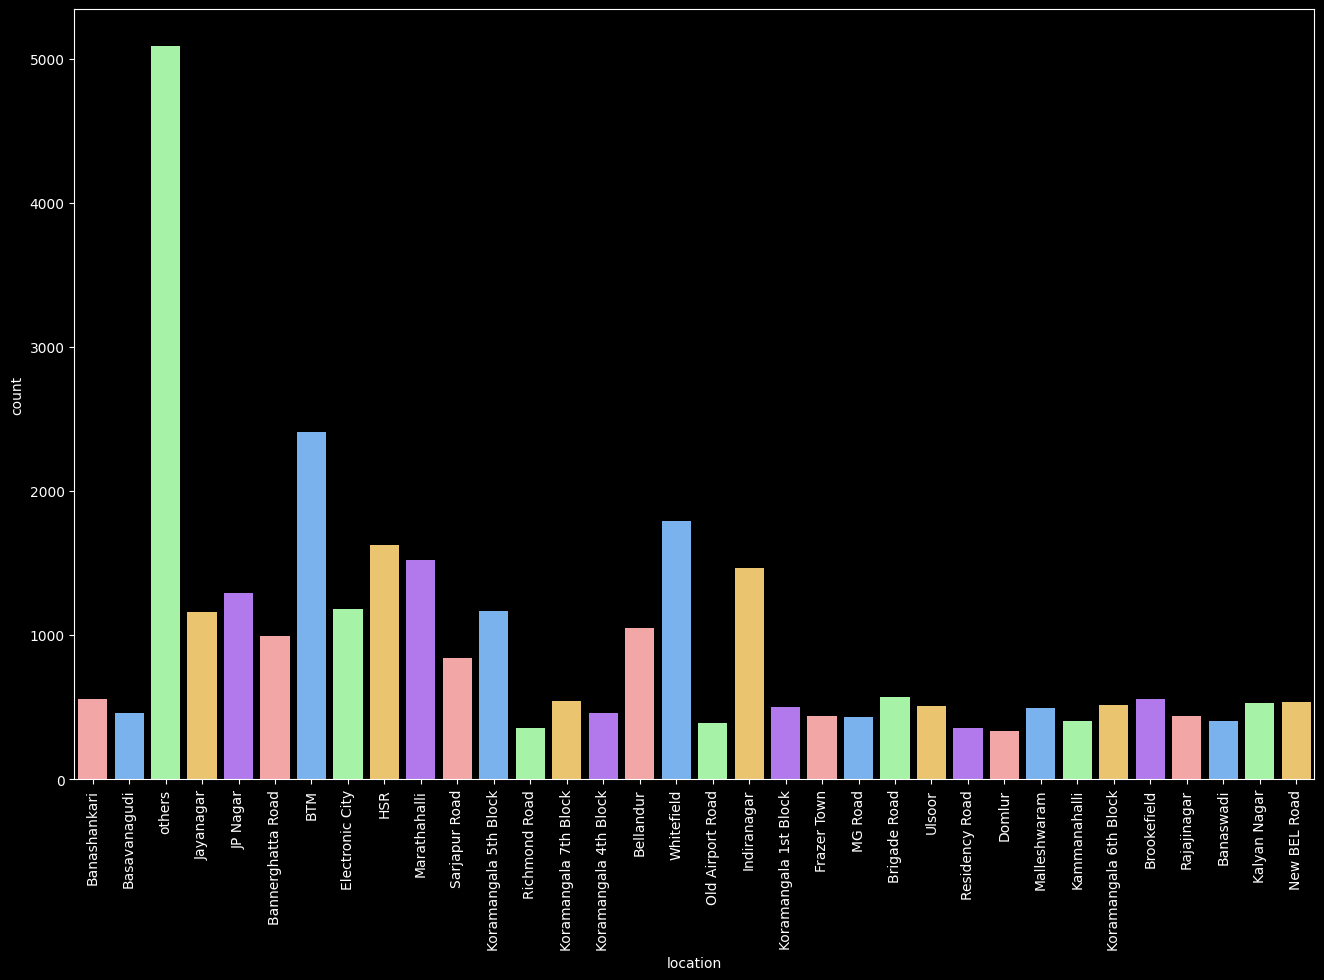

In [ ]:
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC59', '#B266FF']
plt.figure(figsize=(16,10))
ax = sns.countplot(x=df['location'], palette=custom_colors)
plt.xticks(rotation=90)
plt.show()

<ipython-input-35-2680162668>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'], palette='inferno')


<Axes: xlabel='online_order', ylabel='count'>

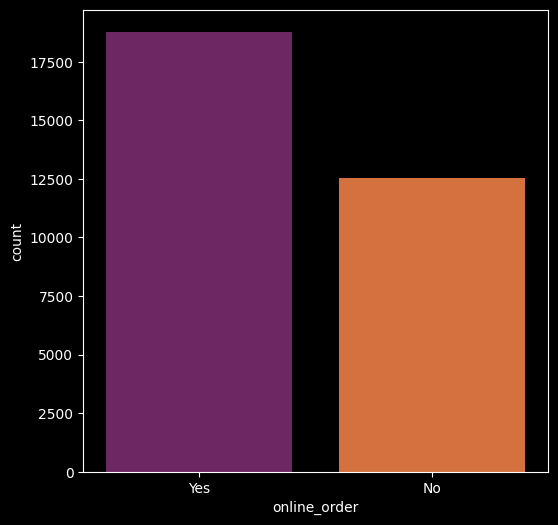

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['online_order'], palette='inferno')

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,others,600.0,Buffet


In [ ]:
df['book_table'].value_counts()

,count
book_table,
No,27646
Yes,3701


<ipython-input-38-1567400137>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['book_table'], palette='rainbow')


<Axes: xlabel='book_table', ylabel='count'>

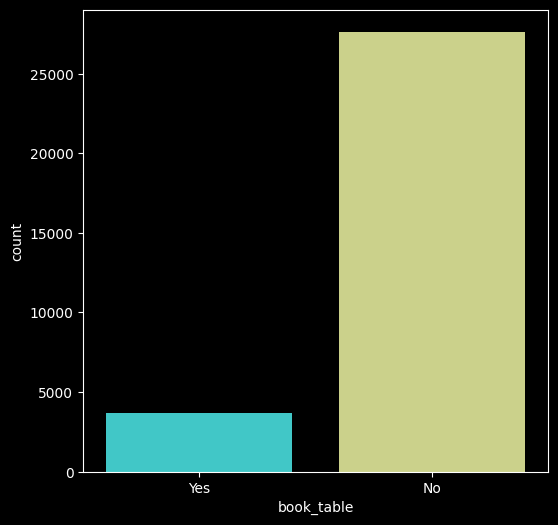

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['book_table'], palette='rainbow')

<Axes: xlabel='online_order', ylabel='rate'>

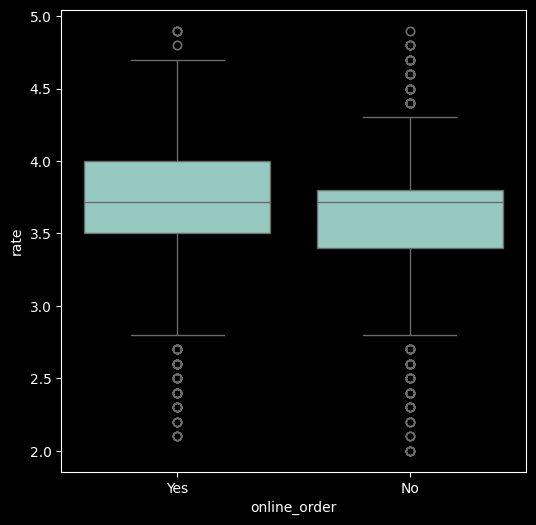

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)

<ipython-input-42-3126509454>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='book_table', y='rate', data=df, palette='inferno')


<Axes: xlabel='book_table', ylabel='rate'>

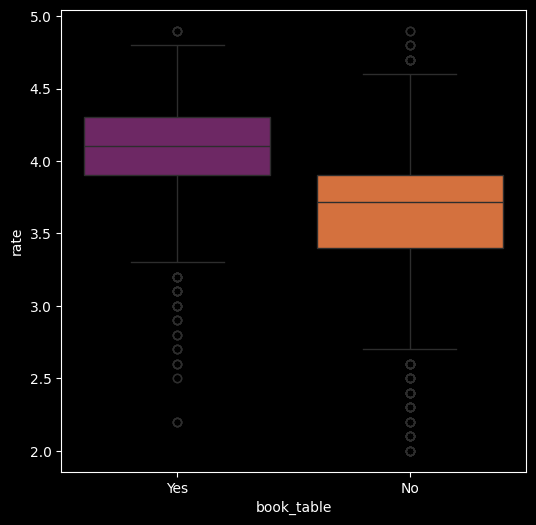

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table', y='rate', data=df, palette='inferno')

In [ ]:
df1 =df.groupby(['location', 'online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

<ipython-input-44-3279046811>:4: FutureWarning: The provided callable <function sum at 0x7b0a74fcd260> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)


name      
online_order             No   Yes
location                         
BTM                     784  1628
Banashankari            256   299
Banaswadi               198   205
Bannerghatta Road       382   608
Basavanagudi            181   276
Bellandur               409   640
Brigade Road            227   345
Brookefield             189   366
Domlur                  182   152
Electronic City         646   535
Frazer Town             201   235
HSR                     403  1224
Indiranagar             549   914
JP Nagar                503   791
Jayanagar               359   798
Kalyan Nagar            214   316
Kammanahalli            172   229
Koramangala 1st Block   144   354
Koramangala 4th Block   209   250
Koramangala 5th Block   385   781
Koramangala 6th Block   183   334
Koramangala 7th Block   167   378
MG Road                 234   199
Malleshwaram            201   295
Marathahalli            577   946
New BEL Road            230   304
Old Airport Road        193   194
Rajajinagar             206   230
Residency Road          217   138
Richmond Road           232   124
Sarjapur Road           254   586
Ulsoor                  191   317
Whitefield              821   967
others                 2252  2838

<Axes: xlabel='location'>

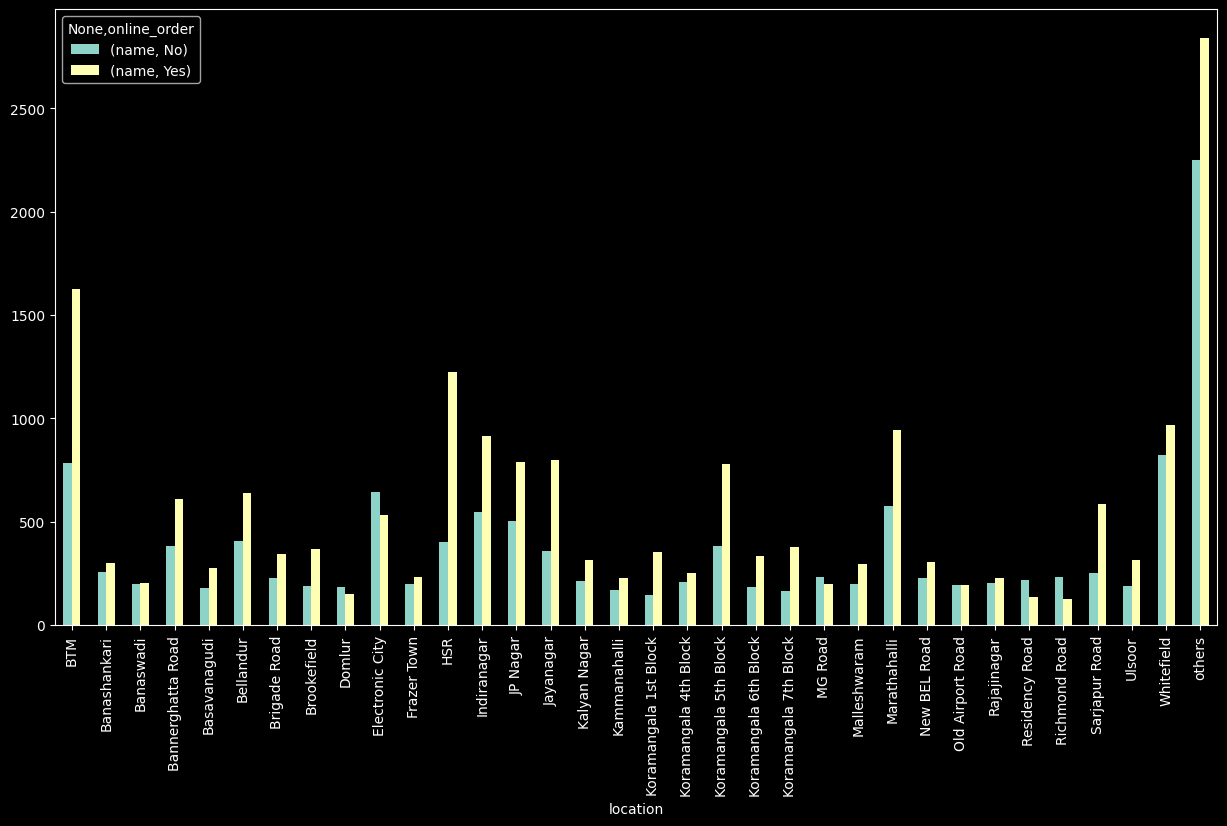

In [ ]:
df1.plot(kind='bar',figsize=(15,8))

In [ ]:
df2 =df.groupby(['location', 'book_table'])['name'].count()
df2.to_csv('location__booktable.csv')
df2 = pd.read_csv('location__booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

<ipython-input-48-1479905875>:4: FutureWarning: The provided callable <function sum at 0x7b0a74fcd260> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)


name     
book_table               No  Yes
location                        
BTM                    2306  106
Banashankari            514   41
Banaswadi               397    6
Bannerghatta Road       933   57
Basavanagudi            445   12
Bellandur               971   78
Brigade Road            491   81
Brookefield             498   57
Domlur                  290   44
Electronic City        1098   83
Frazer Town             432    4
HSR                    1495  132
Indiranagar            1161  302
JP Nagar               1100  194
Jayanagar               970  187
Kalyan Nagar            441   89
Kammanahalli            373   28
Koramangala 1st Block   473   25
Koramangala 4th Block   318  141
Koramangala 5th Block   869  297
Koramangala 6th Block   463   54
Koramangala 7th Block   462   83
MG Road                 257  176
Malleshwaram            441   55
Marathahalli           1424   99
New BEL Road            499   35
Old Airport Road        335   52
Rajajinagar             407   29
Residency Road          268   87
Richmond Road           291   65
Sarjapur Road           751   89
Ulsoor                  409   99
Whitefield             1620  168
others                 4444  646

<Axes: xlabel='location'>

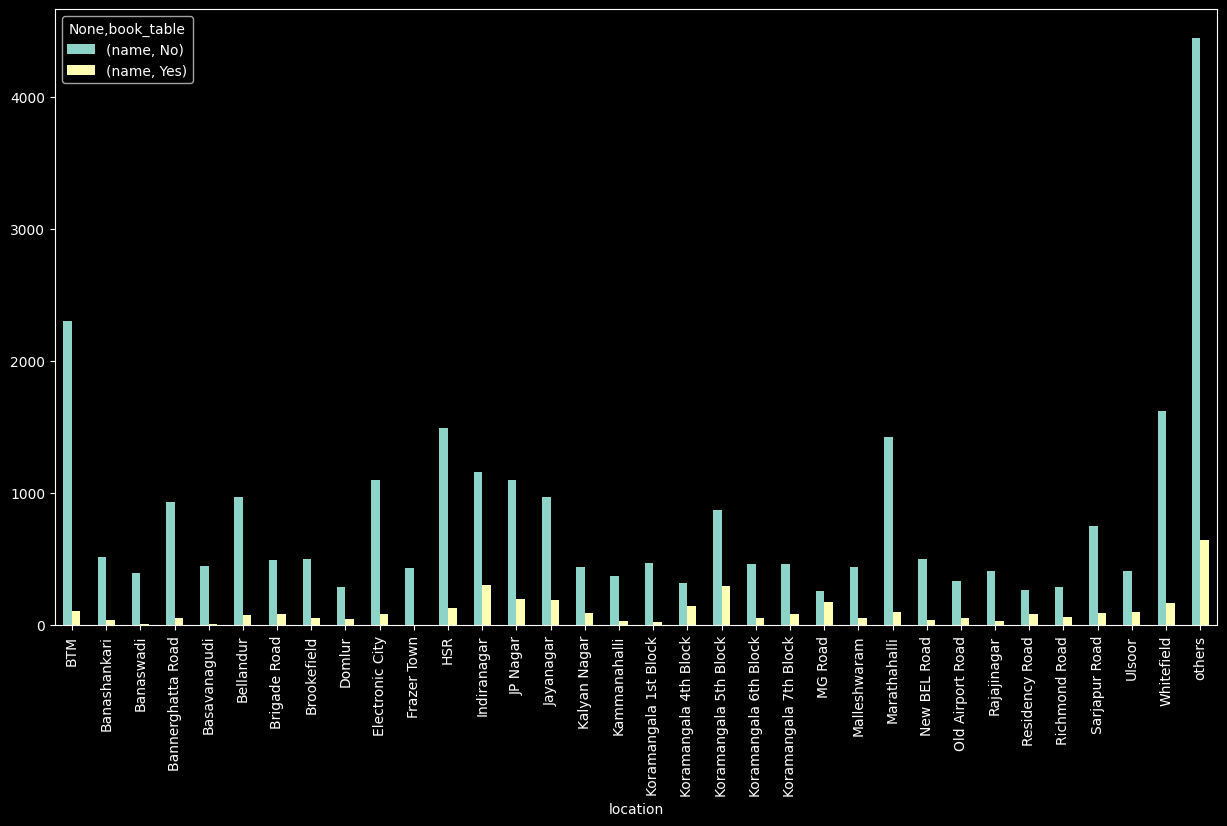

In [ ]:
df2.plot(kind='bar',figsize=(15,8))

<ipython-input-51-4175508833>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'inferno')


<Axes: xlabel='Type', ylabel='rate'>

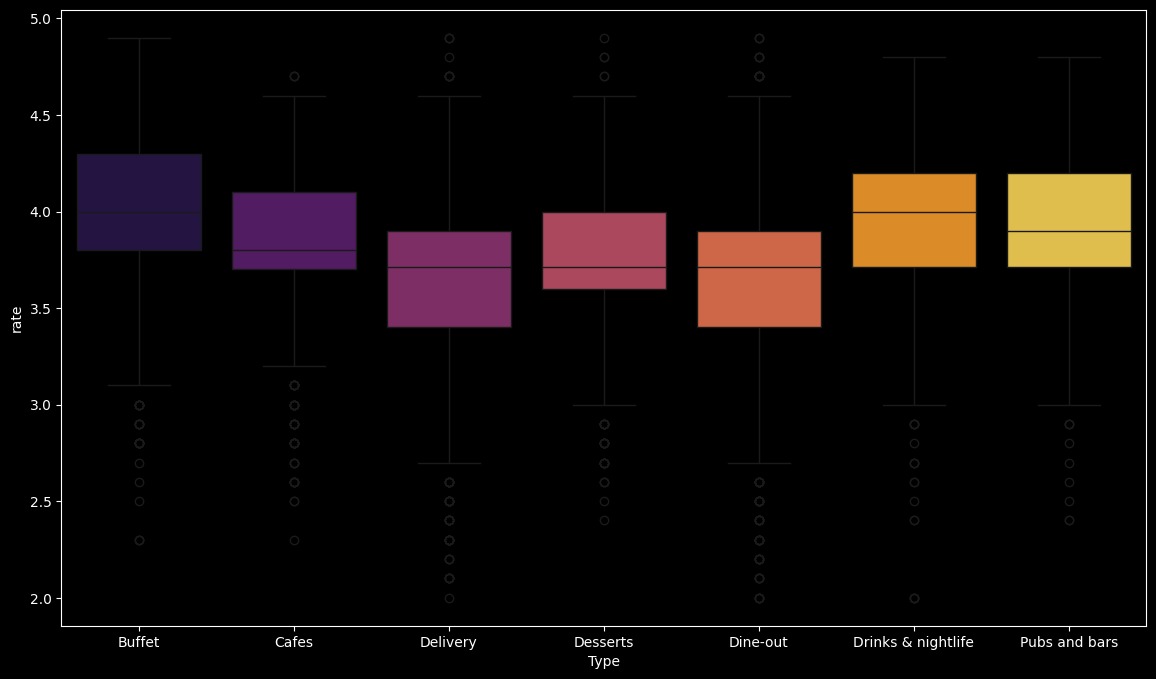

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'inferno')

In [ ]:
df3= df.groupby(['location', 'Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

<ipython-input-52-3668568737>:4: FutureWarning: The provided callable <function sum at 0x7b0a74fcd260> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)


name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       12    44     1380      106      842   
Banashankari               5    24      233       46      240   
Banaswadi                  0    12      155       19      212   
Bannerghatta Road          6    25      480       92      379   
Basavanagudi               4     8      193       45      204   
Bellandur                 23    32      486       67      412   
Brigade Road              13    21      222       45      234   
Brookefield                3    15      282       41      212   
Domlur                    11    12      163       24      103   
Electronic City           20    20      536       70      495   
Frazer Town                1    10      247       43      131   
HSR                       11    31     1018      104      450   
Indiranagar               22    75      729      116      434   
JP Nagar                  22    38      609      100      498   
Jayanagar                 17    42      519      113      454   
Kalyan Nagar               8    20      179       43      269   
Kammanahalli               2    13      156       18      210   
Koramangala 1st Block      3    10      297       30      146   
Koramangala 4th Block     10    30      213       32      121   
Koramangala 5th Block     29    76      502      105      393   
Koramangala 6th Block     11    24      252       40      156   
Koramangala 7th Block     13    30      223       68      188   
MG Road                   23    41      111       33      175   
Malleshwaram               8    24      181       62      201   
Marathahalli              21    26      832       91      542   
New BEL Road               3    25      260       32      205   
Old Airport Road          10     5      172       34      150   
Rajajinagar                9     4      189       44      184   
Residency Road            14    19       91       28      157   
Richmond Road             35     9      104       35      157   
Sarjapur Road             14    17      437       76      277   
Ulsoor                    10    29      205       32      205   
Whitefield                22    40      878      121      674   
others                   100   164     2412      332     1875   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   14            14  
Banashankari                           7             0  
Banaswadi                              4             1  
Bannerghatta Road                      6             2  
Basavanagudi                           3             0  
Bellandur                             15            14  
Brigade Road                          24            13  
Brookefield                            2             0  
Domlur                                11            10  
Electronic City                       20            20  
Frazer Town                            2             2  
HSR                                    5             8  
Indiranagar                           45            42  
JP Nagar                              22             5  
Jayanagar                             12             0  
Kalyan Nagar                          11             0  
Kammanahalli                           2             0  
Koramangala 1st Block                  4             8  
Koramangala 4th Block                 32            21  
Koramangala 5th Block                 35            26  
Koramangala 6th Block                 18            16  
Koramangala 7th Block                  9            14  
MG Road                               29            21  
Malleshwaram                          12             8  
Marathahalli                          10             1  
New BEL Road          

<Axes: xlabel='location'>

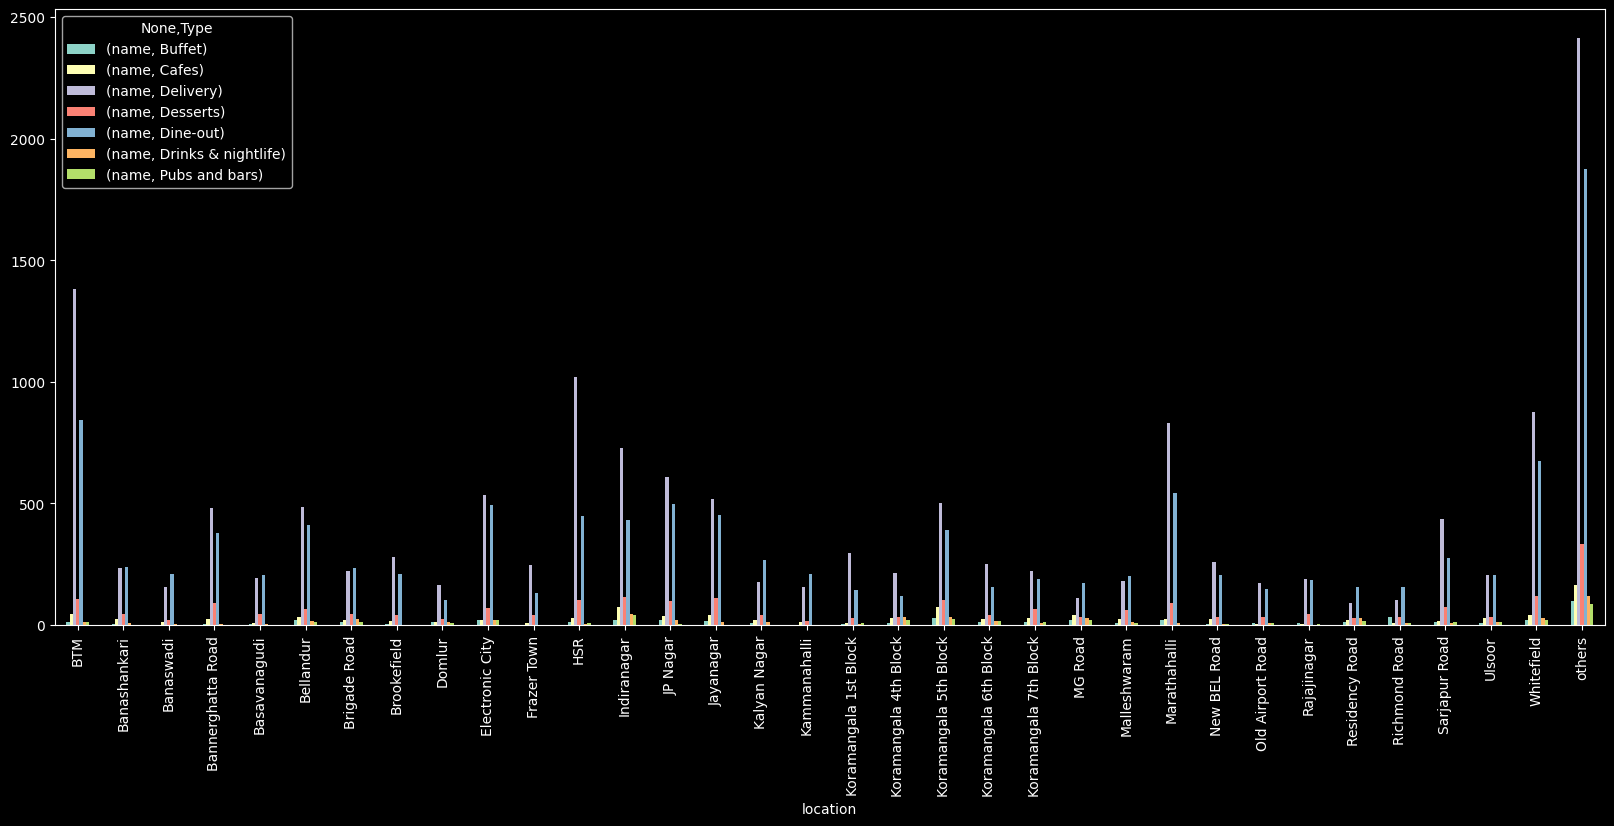

In [ ]:
df3.plot(kind='bar',figsize=(20,8))